BGR1x1特征流形学习分析:


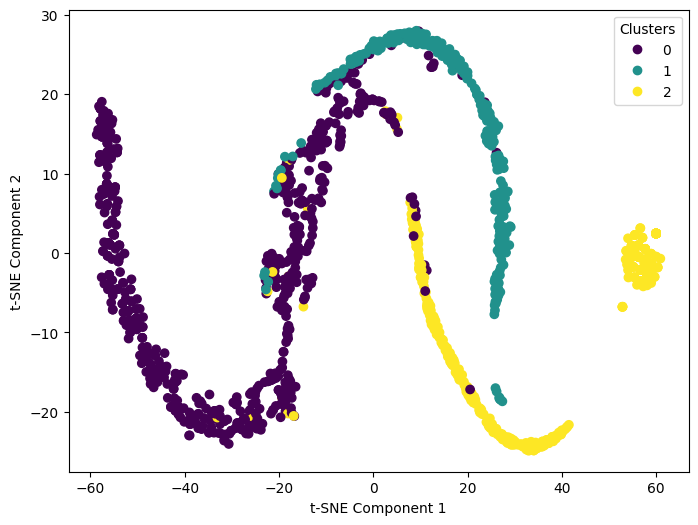

Silhouette Score: 0.2985559403896332
Davies-Bouldin Score: 1.1963988136034303
HSV1x1特征流形学习分析:


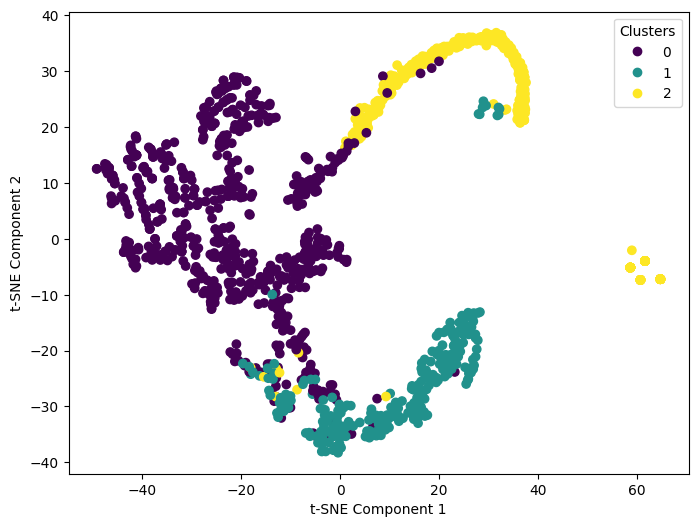

Silhouette Score: 0.41898104548454285
Davies-Bouldin Score: 0.8543411696778255
BGR3x3特征流形学习分析:


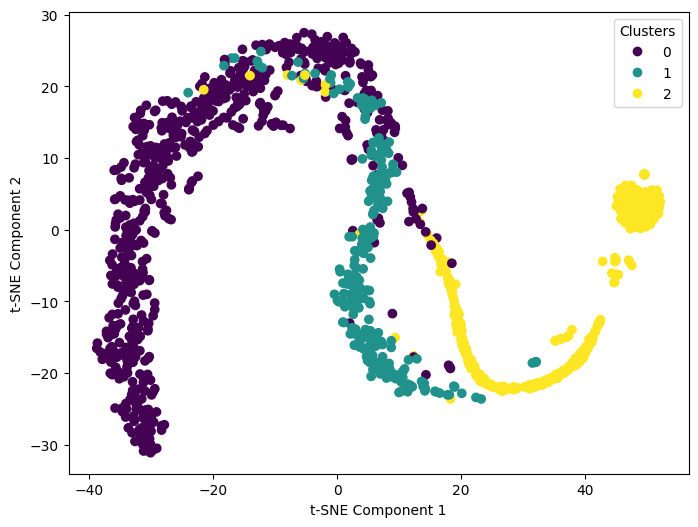

Silhouette Score: 0.2893824577331543
Davies-Bouldin Score: 1.1738208490987831
HSV3x3特征流形学习分析:


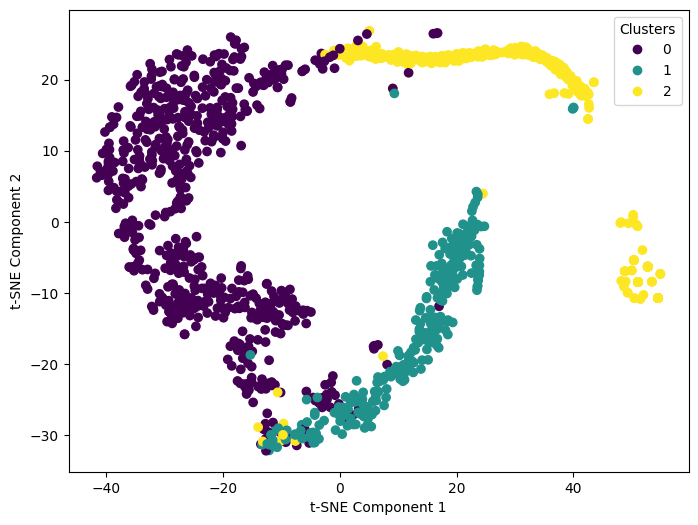

Silhouette Score: 0.3947294056415558
Davies-Bouldin Score: 0.9816926122585962
HOG特征流形学习分析:


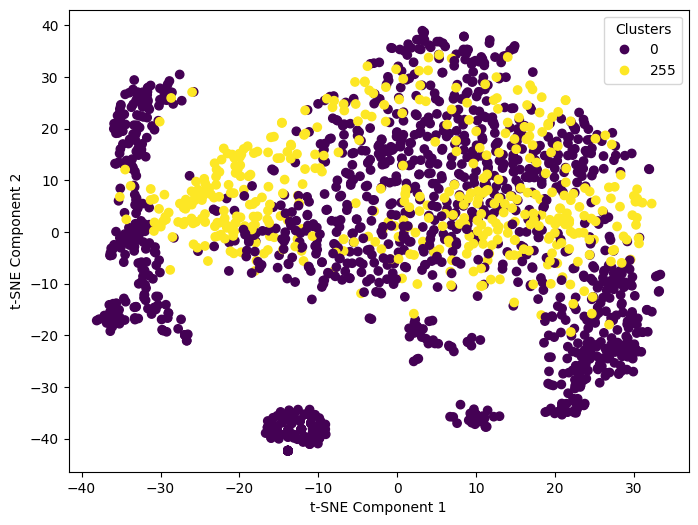

/home/crisi/miniconda3/envs/d2l/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/crisi/miniconda3/envs/d2l/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: -0.036553386598825455
Davies-Bouldin Score: 5.403507598992144
PCA3x3特征流形学习分析:


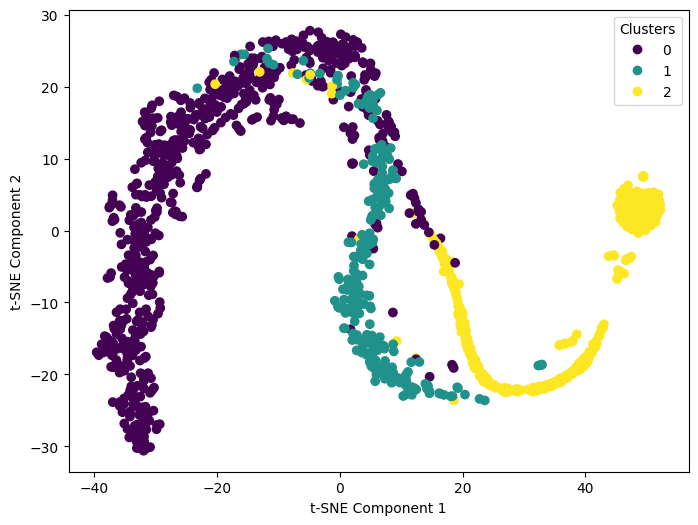

Silhouette Score: 0.29307234287261963
Davies-Bouldin Score: 1.1679866175107243
DictL特征流形学习分析:


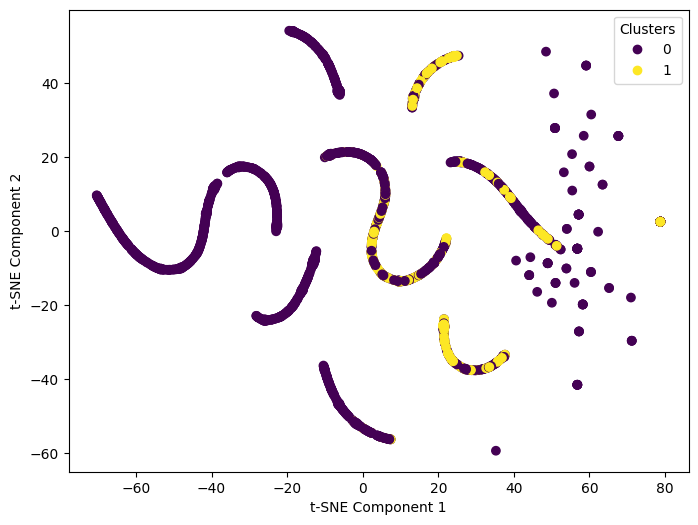

Silhouette Score: -0.03857303410768509
Davies-Bouldin Score: 3.5281679224439553


In [5]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import silhouette_score, davies_bouldin_score

# 数据准备
target = 3
data_name = ['0618', '0854', '1066'][target - 1]
# 基于领域知识
features_bgr1x1 = np.load(f'./Features/{data_name}_BGR1x1_featuers.npy')
features_hsv1x1 = np.load(f'./Features/{data_name}_HSV1x1_features.npy')
features_bgr3x3 = np.load(f'./Features/{data_name}_BGR3x3_featuers.npy')
features_hsv3x3 = np.load(f'./Features/{data_name}_HSV3x3_features.npy')
features_hog = np.load(f'./Features/{data_name}_HOG_featuers.npy')
# 基于数据驱动
features_pca = np.load(f'./Features/{data_name}_PCA3x3_features.npy')
features_DicL = np.load(f'./Features/{data_name}_DictL_features.npy')

# 标签文件加载
labels_bgr1x1 = np.load(f'./Features/{data_name}_BGR1x1_labels.npy')
labels_hsv1x1 = np.load(f'./Features/{data_name}_HSV1x1_labels.npy')
labels_bgr3x3 = np.load(f'./Features/{data_name}_BGR3x3_labels.npy')
labels_hsv3x3 = np.load(f'./Features/{data_name}_HSV3x3_labels.npy')
labels_hog = np.load(f'./Features/{data_name}_HOG_labels.npy')
labels_pca = np.load(f'./Features/{data_name}_PCA3x3_labels.npy')
labels_DicL = np.load(f'./Features/{data_name}_DictL_labels.npy')

# 将数据从 NumPy 转换为 PyTorch 张量，并将其转移到 GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
features_bgr1x1 = torch.tensor(features_bgr1x1, dtype=torch.float32, device=device)
features_hsv1x1 = torch.tensor(features_hsv1x1, dtype=torch.float32, device=device)
features_bgr3x3 = torch.tensor(features_bgr3x3, dtype=torch.float32, device=device)
features_hsv3x3 = torch.tensor(features_hsv3x3, dtype=torch.float32, device=device)
features_hog = torch.tensor(features_hog, dtype=torch.float32, device=device)
features_pca = torch.tensor(features_pca, dtype=torch.float32, device=device)
features_DicL = torch.tensor(features_DicL, dtype=torch.float32, device=device)

# 标签转为PyTorch张量
labels_bgr1x1 = torch.tensor(labels_bgr1x1, dtype=torch.int64, device=device)
labels_hsv1x1 = torch.tensor(labels_hsv1x1, dtype=torch.int64, device=device)
labels_bgr3x3 = torch.tensor(labels_bgr3x3, dtype=torch.int64, device=device)
labels_hsv3x3 = torch.tensor(labels_hsv3x3, dtype=torch.int64, device=device)
labels_hog = torch.tensor(labels_hog, dtype=torch.int64, device=device)
labels_pca = torch.tensor(labels_pca, dtype=torch.int64, device=device)
labels_DicL = torch.tensor(labels_DicL, dtype=torch.int64, device=device)

def manifold_learning(features, n_components=2):
    # 使用 t-SNE 进行流形学习（降维）
    tsne = TSNE(n_components=n_components, random_state=42)
    features_tsne = tsne.fit_transform(features.cpu().numpy())  # 转换为 CPU 上的 NumPy 数组
    return features_tsne

def plot_tsne(features_tsne, labels=None, title=" "):
    plt.figure(figsize=(8, 6))
    if labels is not None:
        scatter = plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels, cmap='viridis')
        plt.legend(*scatter.legend_elements(), title="Clusters")
    else:
        plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c='blue')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.savefig(f'./img/{data_name}_{title}_TSNE.png', bbox_inches='tight', pad_inches=0.1)
    plt.show()

# 计算轮廓系数和Davies-Bouldin指数
def evaluate_tsne(features_tsne, labels):
    # 计算轮廓系数
    sil_score = silhouette_score(features_tsne, labels)
    print(f"Silhouette Score: {sil_score}")
    
    # 计算Davies-Bouldin指数
    db_score = davies_bouldin_score(features_tsne, labels)
    print(f"Davies-Bouldin Score: {db_score}")

# 基于领域知识进行流形学习可视化
print("BGR1x1特征流形学习分析:")
features_tsne_bgr1x1 = manifold_learning(features_bgr1x1)
plot_tsne(features_tsne_bgr1x1, labels=labels_bgr1x1.cpu().numpy(), title="BGR1x1")
evaluate_tsne(features_tsne_bgr1x1, labels_bgr1x1.cpu().numpy())

print("HSV1x1特征流形学习分析:")
features_tsne_hsv1x1 = manifold_learning(features_hsv1x1)
plot_tsne(features_tsne_hsv1x1, labels=labels_hsv1x1.cpu().numpy(), title="HSV1x1")
evaluate_tsne(features_tsne_hsv1x1, labels_hsv1x1.cpu().numpy())

print("BGR3x3特征流形学习分析:")
features_tsne_bgr3x3 = manifold_learning(features_bgr3x3)
plot_tsne(features_tsne_bgr3x3, labels=labels_bgr3x3.cpu().numpy(), title="BGR3x3")
evaluate_tsne(features_tsne_bgr3x3, labels_bgr3x3.cpu().numpy())

print("HSV3x3特征流形学习分析:")
features_tsne_hsv3x3 = manifold_learning(features_hsv3x3)
plot_tsne(features_tsne_hsv3x3, labels=labels_hsv3x3.cpu().numpy(), title="HSV3x3")
evaluate_tsne(features_tsne_hsv3x3, labels_hsv3x3.cpu().numpy())

print("HOG特征流形学习分析:")
features_tsne_hog = manifold_learning(features_hog)
plot_tsne(features_tsne_hog, labels=labels_hog.cpu().numpy(), title="HOG")
evaluate_tsne(features_tsne_hog, labels_hog.cpu().numpy())

# 基于数据驱动进行流形学习可视化
print("PCA3x3特征流形学习分析:")
features_tsne_pca = manifold_learning(features_pca)
plot_tsne(features_tsne_pca, labels=labels_pca.cpu().numpy(), title="PCA3x3")
evaluate_tsne(features_tsne_pca, labels_pca.cpu().numpy())

print("DictL特征流形学习分析:")
features_tsne_dicL = manifold_learning(features_DicL)
plot_tsne(features_tsne_dicL, labels=labels_DicL.cpu().numpy(), title="DictL")
evaluate_tsne(features_tsne_dicL, labels_DicL.cpu().numpy())
